# Moving Average Strat

* import the data for the stock and format it


In [81]:
import pandas as pd
import numpy as np
import yfinance as yf
import pandas_ta as ta
import matplotlib.pyplot as plt


end_date = '2025-06-27'
start_date = '2023-06-07'
stock = 'BLK'

df = yf.download(tickers=stock,start=start_date,end=end_date,auto_adjust=True)
df.columns = df.columns.get_level_values(0)
df.columns = df.columns.str.lower()
df


[*********************100%***********************]  1 of 1 completed


Price,close,high,low,open,volume
Date,,,,,
2023-06-07,646.311951,648.027288,638.650340,647.045732,534100
2023-06-08,648.551392,649.809278,634.667060,643.538922,521800
2023-06-09,652.191528,654.145042,645.397068,650.276111,465300
2023-06-12,650.266663,656.689464,650.152315,652.391698,435000
2023-06-13,656.660889,660.472645,652.763342,653.077828,624000
...,...,...,...,...,...
2025-06-20,974.440002,986.909973,973.210022,982.210022,859500
2025-06-23,986.299988,986.450012,966.479980,975.320007,642900
2025-06-24,1004.969971,1005.849976,993.000000,995.500000,699500


# Create The Moving Average Function

* Plot the graph

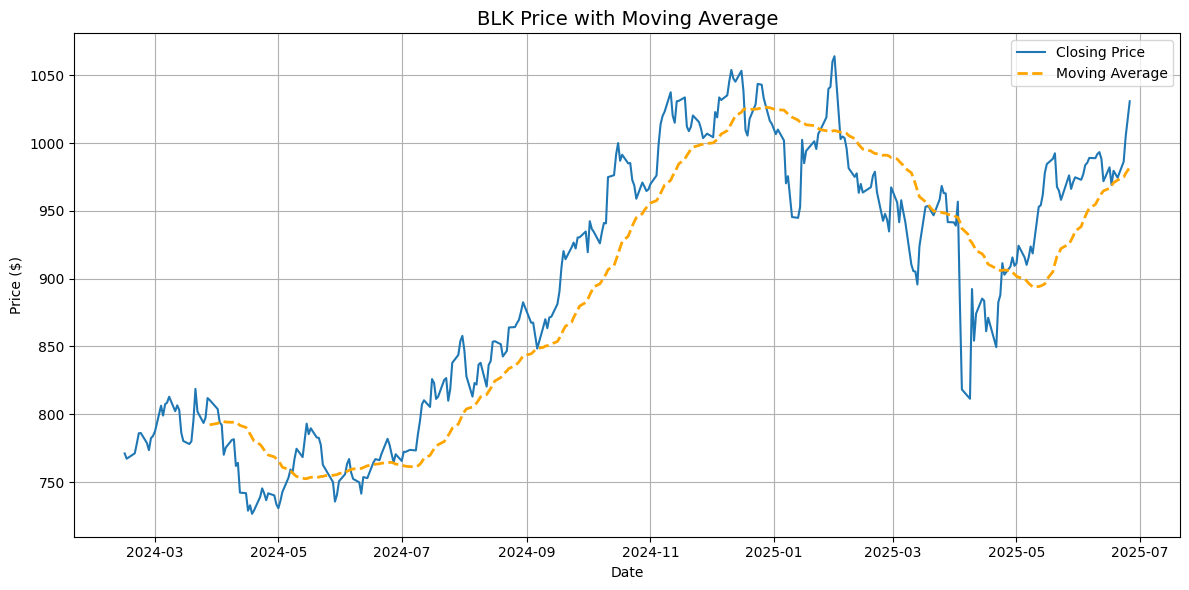

In [98]:
def moving_avg(window):
    df['moving avg'] = df['close'].rolling(window=window).mean()
    return df

df = moving_avg(30)

plt.figure(figsize=(12,6))
plt.plot(df.index, df['close'], label='Closing Price', linewidth=1.5)
plt.plot(df.index, df['moving avg'], label='Moving Average', linewidth=2, linestyle='--', color="orange")

plt.title(f'{stock} Price with Moving Average', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [105]:
def trade(df):
    position = 0
    cash = 10000
    shares = 0

    for i in range(len(df)):
        close_price = df['close'].iloc[i]
        moving_average = df['moving avg'].iloc[i]

        if position == 0 and close_price > moving_average:
            shares = cash // close_price
            cash -= shares * close_price
            position = 1
            print(f"Bought {shares} shares at {close_price} on {df.index[i].date()}")

        elif position == 1 and close_price < moving_average:
            cash += shares * close_price
            print(f"Sold {shares} shares at {close_price} on {df.index[i].date()}")
            shares = 0
            position = 0
    print(f"End cash balance: {cash}")

trade(df)

Bought 12.0 shares at 810.5680541992188 on 2024-03-28
Sold 12.0 shares at 793.9328002929688 on 2024-04-02
Bought 12.0 shares at 759.2525024414062 on 2024-05-07
Sold 12.0 shares at 756.7344360351562 on 2024-05-08
Bought 12.0 shares at 767.2347412109375 on 2024-05-09
Sold 12.0 shares at 750.0062866210938 on 2024-05-28
Bought 12.0 shares at 763.5012817382812 on 2024-06-04
Sold 12.0 shares at 756.9288330078125 on 2024-06-06
Bought 12.0 shares at 764.4155883789062 on 2024-06-17
Sold 12.0 shares at 848.4241333007812 on 2024-09-06
Bought 12.0 shares at 864.293701171875 on 2024-09-09
Sold 12.0 shares at 1009.4147338867188 on 2024-12-18
Bought 11.0 shares at 1028.6077880859375 on 2024-12-23
Sold 11.0 shares at 1016.46875 on 2024-12-30
Bought 11.0 shares at 1018.951904296875 on 2025-01-27
Sold 11.0 shares at 1002.9346923828125 on 2025-02-03
Bought 12.0 shares at 958.4241943359375 on 2025-03-24
Sold 12.0 shares at 941.7127075195312 on 2025-03-28
Bought 12.0 shares at 956.77294921875 on 2025-04-02